In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import stopwords

In [62]:
with open('C:\\Users\\tanay_gaur\\Downloads\\Client_data.json') as datafile:
    data = json.load(datafile)
df = pd.DataFrame(data)
df.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0.0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0.0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0.0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0.0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0.0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [63]:
#converitng dictionary column to a dataframe
df2 = pd.json_normalize(df["_source"])
df2.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [64]:
#check for null values
df2.isnull().sum()/len(df2)

tags                         0.860815
zip_code                     0.086282
complaint_id                 0.000000
issue                        0.000000
date_received                0.000000
state                        0.025424
consumer_disputed            0.000000
product                      0.000000
company_response             0.000000
company                      0.000000
submitted_via                0.000000
date_sent_to_company         0.000000
company_public_response      0.999949
sub_product                  0.134984
timely                       0.000000
complaint_what_happened      0.000000
sub_issue                    0.591179
consumer_consent_provided    0.012871
dtype: float64

<h2>EDA</h2>

In [65]:
df2.describe()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
count,10900,71556,78313,78313,78313,76322,78313,78313,78313,78313,78313,78313,4,67742,78313,78313,32016,77305
unique,3,9442,78313,154,3444,62,3,17,8,1,6,3309,3,72,2,20931,205,5
top,Older American,606XX,3211475,"Loan modification,collection,foreclosure",2015-08-27T12:00:00-05:00,CA,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2012-06-21T12:00:00-05:00,Company has responded to the consumer and the ...,Checking account,Yes,,Credit card company isn't resolving a dispute ...,N/A
freq,6103,472,1,9743,82,14009,35683,22725,60230,78313,47972,105,2,17182,78217,57241,2904,42847


Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money transfers                                       

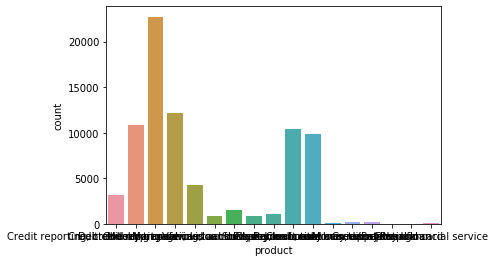

In [66]:
print(df2['product'].value_counts())
sns.countplot(df2['product'])
plt.show()

Checking account                              17182
General-purpose credit card or charge card    10504
Other mortgage                                 8447
Conventional fixed mortgage                    4892
Credit reporting                               4172
                                              ...  
Gift or merchant card                             4
Government benefit payment card                   4
ID prepaid card                                   2
Medical debt                                      2
Electronic Benefit Transfer / EBT card            1
Name: sub_product, Length: 72, dtype: int64


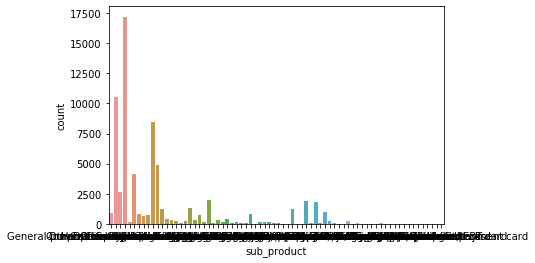

In [67]:
print(df2['sub_product'].value_counts())
sns.countplot(df2['sub_product'])
plt.show()

<h2>Preprocessing</h2>

In [68]:
def decontractions(phrase):

    """decontracted takes text and convert contractions into natural form."""

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"isn\’t", "is not", phrase)
    phrase = re.sub(r"didn\’t", "did not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)



    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def preprocess(text):

    # convert all the text into lower letters
    # use this function to remove the contractions: https://gist.github.com/anandborad/d410a49a493b56dace4f814ab5325bbd
    # remove all the spacial characters: except space ' '

    text = text.lower()
    text = decontractions(text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = lemmatize_sentences(text)

    return text


def preprocess_ita(text):

    # convert all the text into lower letters
    # remove the words betweent brakets ()
    # remove these characters: {'$', ')', '?', '"', '’', '.',  '°', '!', ';', '/', "'", '€', '%', ':', ',', '('}
    # replace these spl characters with space: '\u200b', '\xa0', '-', '/'
    # we have found these characters after observing the data points, feel free to explore more and see if you can do find more
    # you are free to do more proprocessing
    # note that the model will learn better with better preprocessed data 

    text = text.lower()
    text = decontractions(text)
    text = re.sub('[$)\?"’.°!;\'€%:,(/]', '', text)
    text = re.sub('-', ' ', text)
    return text


def lemmatize_sentences(sentence):
    tokens = sentence.split()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [69]:
df2['complaint_what_happened'][2]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

In [70]:
df2['complaint_what_happened'][2]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

In [71]:
#combine product and sub_product feature
df2['product_category'] = df2['product'] + ' '+ df2['sub_product']
df2["product_category"].fillna("", inplace = True)
df2['product_category'] = df2['product_category'].apply(preprocess)

In [72]:
from nltk.tokenize import word_tokenize
word_data = []
df2["all_text"] = df2["product_category"]+df2["complaint_what_happened"]
word_data = df2["all_text"].apply(lambda x:word_tokenize(x))

In [73]:
word_data

0                   [debt, collection, credit, card, debt]
1        [debt, collection, credit, card, debtGood, mor...
2        [credit, card, or, prepaid, card, generalpurpo...
3                 [mortgage, conventional, home, mortgage]
4        [credit, card, or, prepaid, card, generalpurpo...
                               ...                        
78308    [checking, or, saving, account, checking, acco...
78309    [credit, card, or, prepaid, card, generalpurpo...
78310    [checking, or, saving, account, checking, acco...
78311    [credit, card, or, prepaid, card, generalpurpo...
78312    [Roughly, 10+, years, ago, I, closed, out, my,...
Name: all_text, Length: 78313, dtype: object

In [74]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# tfidf_product_cat = tfidf.fit_transform(df2.product_category)

# tfidf = TfidfVectorizer()
# tfidf_complaint_what_happened = tfidf.fit_transform(df2.complaint_what_happened)

In [75]:
# import scipy
# train_features = scipy.sparse.hstack([tfidf_product_cat, tfidf_complaint_what_happened]).todense()

In [76]:
from gensim.corpora import Dictionary

In [77]:
dictionary=Dictionary(word_data)

In [78]:
corpus = [dictionary.doc2bow(text) for text in word_data]

In [79]:
from gensim.models import LdaModel

In [ ]:
model = LdaModel(corpus=corpus,id2word=dictionary,num_topics=5,chunksize=250,iterations=500)

In [ ]:
model.save("lda1")

In [ ]:
model = LdaModel.load("lda1")

In [ ]:
model.show_topics(num_topics=5)

In [ ]:
model.log_perplexity(corpus)

In [ ]:
!pip install markupsafe==2.0.1
#pip install pyLDAvis.gensim

In [ ]:
import pyLDAvis.gensim_models as pylds
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pylds.prepare(model,corpus,dictionary)
vis

#### 
def extract(x):
    max_tup = (0,0)
    for i in x:
        if i[1]>max_tup[1]:
            max_tup = i
    return max_tup[0]

In [ ]:
def extract(x):
    max_tup = (0,0)
    for i in x:
        if i[1]>max_tup[1]:
            max_tup = i
    return max_tup[0]

In [46]:
topics = []
for i in corpus:
    topics.append(extract(model.get_document_topics(i)))

In [47]:
len(df2["all_text"])

78313

In [48]:
len(topics)

78313

In [49]:
df_results= pd.DataFrame([np.array(df2["all_text"]),topics]).T

In [55]:
df_results.head()

,0,1
0,debt collection credit card debt,0
1,debt collection credit card debtgood morning a...,4
2,credit card or prepaid card generalpurpose cre...,4
3,mortgage conventional home mortgage,3
4,credit card or prepaid card generalpurpose cre...,1
